In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [67]:
N = 3 #Number of colonies
Adot = 1  #Time derivative of Area
T = 100  #Max time of evolution
L = 12
#Length of the square box
dr = L/400  #Rate of change in redius
a = 6 #Determines the number of directions that the colonies expand to
dmin = dr*13  #Distance that is considered too close to be able to grow further

## Defining initial positions

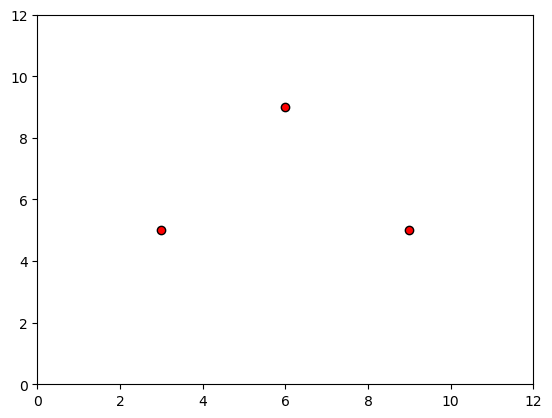

In [6]:
x0,y0 = np.zeros(N),np.zeros(N)

x0[0],y0[0] = 6,9
x0[1],y0[1] = 3,5
x0[2],y0[2] = 9,5
# # x0[3],y0[3] =8,7
# # x0[4],y0[4] = 6,8.5
# # x0[5],y0[5] = 6,3.5
# # x0[6],y0[6] = 6,6



#Reproduction of experimet 1
# x0[0],y0[0] = 3,6
# x0[1],y0[1] = 4,4 #6,6-np.sqrt(3)
# x0[2],y0[2] = 6,6.5  #4,6-np.sqrt(3)
# x0[3],y0[3] = 8,3.5
# x0[4],y0[4] = 6,5.5
# x0[5],y0[5] = 4.5,8
# x0[6],y0[6] = 8,8.5


#Reproduction of experiment 2
# x0[0],y0[0] = 6,6
# x0[1],y0[1] = 6.7,6.7 #6,6-np.sqrt(3)
# x0[2],y0[2] = 8.5,8.5  #4,6-np.sqrt(3)
# x0[3],y0[3] = 7.5,9
# x0[4],y0[4] = 7,4
# x0[5],y0[5] = 8.5,4.5
# x0[6],y0[6] = 4.8,4.2
# x0[7],y0[7] = 4.4,5.5
# x0[8],y0[8] = 4,7.4

plt.ylim(0,L)
plt.xlim(0,L)
plt.scatter(x0,y0,c="r",edgecolors="black")


### This is random initial positions of the colonies. We don't need it now !

In [61]:
x0,y0 = np.zeros(N),np.zeros(N)


x0[0],y0[0] = np.random.uniform(L,5*L),np.random.uniform(L/10,9*L/10)
for i in range(1,N):
    #Choose the position of the next colony to be within L/N of the previous one with some normal randomness
    x0[i] = np.random.normal((x0[i-1])%L, L)%L
    y0[i] = np.random.normal((y0[i-1])%L, L)%L
    #Shift the positions towards middle so that we are faraway enough from the walls
    x0[i] += np.sign(L/2 - x0[i])*np.random.uniform(L/10, 2*L/10)
    y0[i] += np.sign(L/2 - y0[i])*np.random.uniform(L/10, 2*L/10)
    
    
# plt.ylim(0,L)
# plt.xlim(0,L)
# plt.scatter(x0,y0)

Collision condition

In [35]:
def collision(x1,y1,x2,y2,i):  #(x1,y1) is a point and (x2,y2) are a set of points
    
    if np.sqrt((x1-6)**2+(y1-6)**2)>=5:
        return 0
    c = [n for n in range(N) if n!=i]  #For the clusters other than the one containing (x1,y1)
    for k in c:
        for j in range(len(x2[k])):
            if (x1 - x2[k][j])**2 + (y1 - y2[k][j])**2 < dmin*dmin:
                return 0
    return 1

Time evolution

In [61]:
x,y = [[x0[i]] for i in range(N)],[[y0[i]] for i in range(N)]
center = 6
time_step = 100

for t in range(1,time_step):  #Each time
    theta = 2*np.pi/(a*t)  #The angle between adjacent expand direction
    for i in range(N):  #Each colony
        for j in range(a*t):  #Each direction
            
            dx = center - x0[i]   # x relative to the center
            dy = center - y0[i]   # y relative to the center
            value = np.arctan2(dy, dx)  # Correctly compute angle
            
            value += np.pi              # Shift negative angles to [0, 2π]
           
            p = x[i][0] + t*(dr)*np.cos(j*theta+value)
            q = y[i][0] + t*(dr)*np.sin(j*theta+value)
            if collision(p,q,x,y,i) == 1:
                x[i] += [p]
                y[i] += [q]

    


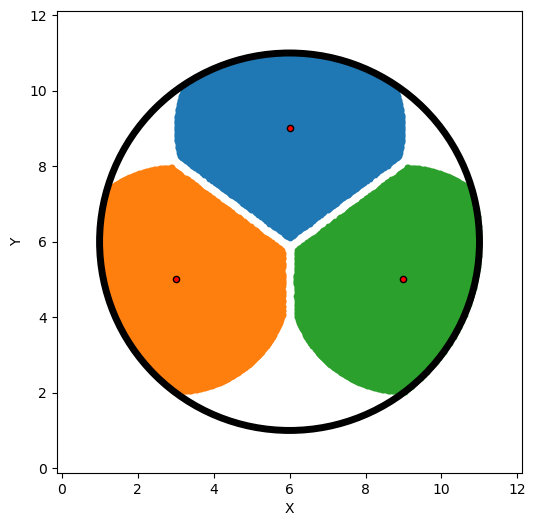

In [65]:
plt.figure(figsize=(6, 6))
plt.ylim(-4*dr,L+4*dr)
plt.xlim(-4*dr,L+4*dr)
for i in range(N):
    
    plt.scatter(x[i],y[i],s=10)
    plt.scatter(x[i][0],y[i][0],s=20,c="r",edgecolors="black")
circle=plt.Circle((6,6),5, color='black', fill=False,linewidth=5)

ax = plt.gca()
plt.xlabel("X")
plt.ylabel("Y")

ax.add_patch(circle)
# plt.savefig("9_rand", dpi=300)
plt.show()


In [73]:
# creating movie 

from matplotlib.animation import FuncAnimation

# Initial setup
x, y = [[x0[i]] for i in range(N)], [[y0[i]] for i in range(N)]
center = 6
fig, ax = plt.subplots(figsize=(6, 6))
scatters = [ax.scatter([], [], s=10) for _ in range(N)]
centers = [ax.scatter([], [], s=20, c='r', edgecolors='black') for _ in range(N)]
circle = plt.Circle((6,6), 5, color='black', fill=False, linewidth=5)
ax.add_patch(circle)
ax.set_xlim(-4*dr, L+4*dr)
ax.set_ylim(-4*dr, L+4*dr)
ax.set_xlabel("X")
ax.set_ylabel("Y")

def update(t):
    if t == 0:
        return scatters + centers
    
    theta = 2*np.pi/(a*t)
    for i in range(N):
        for j in range(a*t):
            dx = center - x0[i]
            dy = center - y0[i]
            value = np.arctan2(dy, dx) + np.pi

            p = x[i][0] + t*dr*np.cos(j*theta + value)
            q = y[i][0] + t*dr*np.sin(j*theta + value)

            if collision(p, q, x, y, i) == 1:
                x[i].append(p)
                y[i].append(q)

    for i in range(N):
        scatters[i].set_offsets(np.c_[x[i], y[i]])
        centers[i].set_offsets([[x[i][0], y[i][0]]])
    return scatters + centers

ani = FuncAnimation(fig, update, frames=110, interval=200, blit=True)

# To display in a notebook:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# To save to a file:
ani.save('colony_growth.mp4', fps=5)

plt.close()


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Initial setup
x, y = [[x0[i]] for i in range(N)], [[y0[i]] for i in range(N)]
center = 6

fig, ax = plt.subplots(figsize=(8, 8))  # Bigger figure for better quality
scatters = [ax.scatter([], [], s=10) for _ in range(N)]
centers = [ax.scatter([], [], s=20, c='r', edgecolors='black') for _ in range(N)]

# Petri dish boundary
circle = plt.Circle((6, 6), 5, color='black', fill=False, linewidth=3)
ax.add_patch(circle)

# Hide axis ticks and spines
ax.set_xlim(-4*dr, L + 4*dr)
ax.set_ylim(-4*dr, L + 4*dr)
ax.axis('off')

# Time label
time_text = ax.text(0.02, 0.98, '', transform=ax.transAxes,
                    ha='left', va='top', fontsize=14, fontweight='bold')

def update(t):
    if t == 0:
        time_text.set_text(f'Time step: {t}')
        return scatters + centers + [time_text]
    
    theta = 2 * np.pi / (a * t)
    for i in range(N):
        for j in range(a * t):
            dx = center - x0[i]
            dy = center - y0[i]
            value = np.arctan2(dy, dx) + np.pi

            p = x[i][0] + t * dr * np.cos(j * theta + value)
            q = y[i][0] + t * dr * np.sin(j * theta + value)

            if collision(p, q, x, y, i) == 1:
                x[i].append(p)
                y[i].append(q)

    for i in range(N):
        scatters[i].set_offsets(np.c_[x[i], y[i]])
        centers[i].set_offsets([[x[i][0], y[i][0]]])
    
    time_text.set_text(f'Time step: {t}')
    return scatters + centers + [time_text]

ani = FuncAnimation(fig, update, frames=111, interval=200, blit=True)

# Save with high resolution
ani.save('colony_growth.mp4', fps=5, dpi=200)

plt.close()
